# 120.LeNet-5 (1998, Yan LeCunn)

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, AveragePooling2D, Flatten

np.random.seed(102)

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

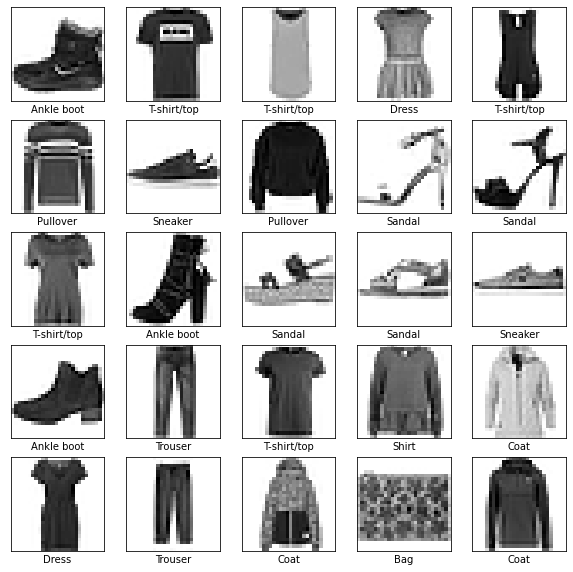

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [10]:
X_train = train_images / 255.0
X_test = test_images / 255.0

In [11]:
# Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가
X_train = np.expand_dims(X_train_scaled, axis=3)
X_test = np.expand_dims(X_test_scaled, axis=3)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# label 을 one-hot-encoding
y_train_onehot = tf.keras.utils.to_categorical(train_labels)
y_test_onehot = tf.keras.utils.to_categorical(test_labels)

In [17]:
# tf.data 를 이용한 shuffling and batch 구성
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test_onehot)).batch(128)

In [18]:
# LeNet model 구성
# LeNet
model = tf.keras.Sequential()
model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [19]:
# model compile and predict
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6776 - accuracy: 0.7556 - val_loss: 0.5304 - val_accuracy: 0.8029
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4407 - accuracy: 0.8404 - val_loss: 0.4263 - val_accuracy: 0.8412
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3770 - accuracy: 0.8623 - val_loss: 0.3726 - val_accuracy: 0.8630
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3408 - accuracy: 0.8750 - val_loss: 0.3425 - val_accuracy: 0.8741
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3144 - accuracy: 0.8846 - val_loss: 0.3283 - val_accuracy: 0.8812


Test Score  0.328271746635437
Test Accuracy  0.8812000155448914


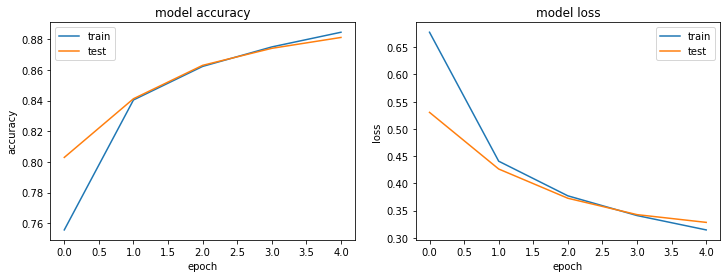

In [20]:
# train history 시각화
score = model.evaluate(test_ds, verbose=0)
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Accuracy : 0.8812


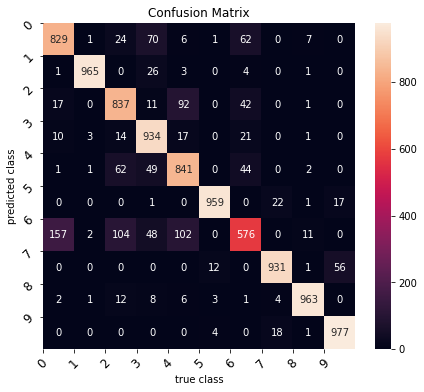

In [22]:
# confusion matrix 시각화
y_pred = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))